## Preface

Hello, I am an aspiring HR Analyst who has been self-learning python for a few months now. I am hoping that through creating these notebooks for datasets that I find on Kaggle I can improve my python, data analysis, and machine learning algorithm skills. 

Any feedback would be greatly appreciated.

Now onto the actual project.

## Introduction

Most, if not all companies invest significant resources into acquiring and training their employees, thus it is always important for them to retain the talent they have invested so much in. Having employees leave your company would mean that even more resources need to be poured into their replacements, who also face the same risks. 

Thus, it is important for companies to be able to predict employee attrition in order to develop strategies to reduce the phenomena. 

In this kaggle notebook, we will do the following:

* **Exploratory Data Analysis** - Exploring the data and how features correlate to one another.
* **Feature Engineering** - in order to prepare our categorical data for our machine learning model.
* **Machine Learning Model Implementation** - Implementing a Random Forest Classifier model for our data.




In [1]:
#importing the usual libraries for EDA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### 1. Exploratory Data Analysis

The first step when tackling any dataset. We must first take a look at our data, explore the relationship between its features, and make some observations.

In [2]:
#loading the data into a DataFrame
df = pd.read_csv('../input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
#taking a peek into the DataFrame
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
#Getting some more information about the dataset
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [5]:
#checking for null/missing values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
df.info()

#seems that there are some categorical columns in this df, let's explore them

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
#Exploring the target feature
df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

### Feature Engineering

Before carrying on with EDA, I would like to convert categorical features into numerical ones through one of the many methods for doing so. This would help give a clearer idea of what's going on with the data.

In [8]:
#let's assign 1s and 0s to the Attrition column
df['Attrition'].replace(to_replace = dict(Yes = 1, No = 0), inplace = True)

In [9]:
#Assigning categorical features to 'categorical_cols'
categorical_cols = []
for col, value in df.iteritems():
    if value.dtype == 'object':
        categorical_cols.append(col)

In [10]:
#storing these columns in a new dataframe called df_cat
df_cat = df[categorical_cols]
df_cat.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [11]:
#taking a peek at the unique values in each of the categorical columns
for column in categorical_cols:
    print(f"{column} : {df[column].unique()}")
    print("-"*40)

BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
----------------------------------------
Department : ['Sales' 'Research & Development' 'Human Resources']
----------------------------------------
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
----------------------------------------
Gender : ['Female' 'Male']
----------------------------------------
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
----------------------------------------
MaritalStatus : ['Single' 'Married' 'Divorced']
----------------------------------------
Over18 : ['Y']
----------------------------------------
OverTime : ['Yes' 'No']
----------------------------------------


In [12]:
#assigning numerical variables to our categorical data through sklearn's LabelEncoder
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
for column in categorical_cols:
    df[column] = label.fit_transform(df[column])

In [13]:
#checking our new DataFrame with numerical values
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


Now, we can carry on with our EDA

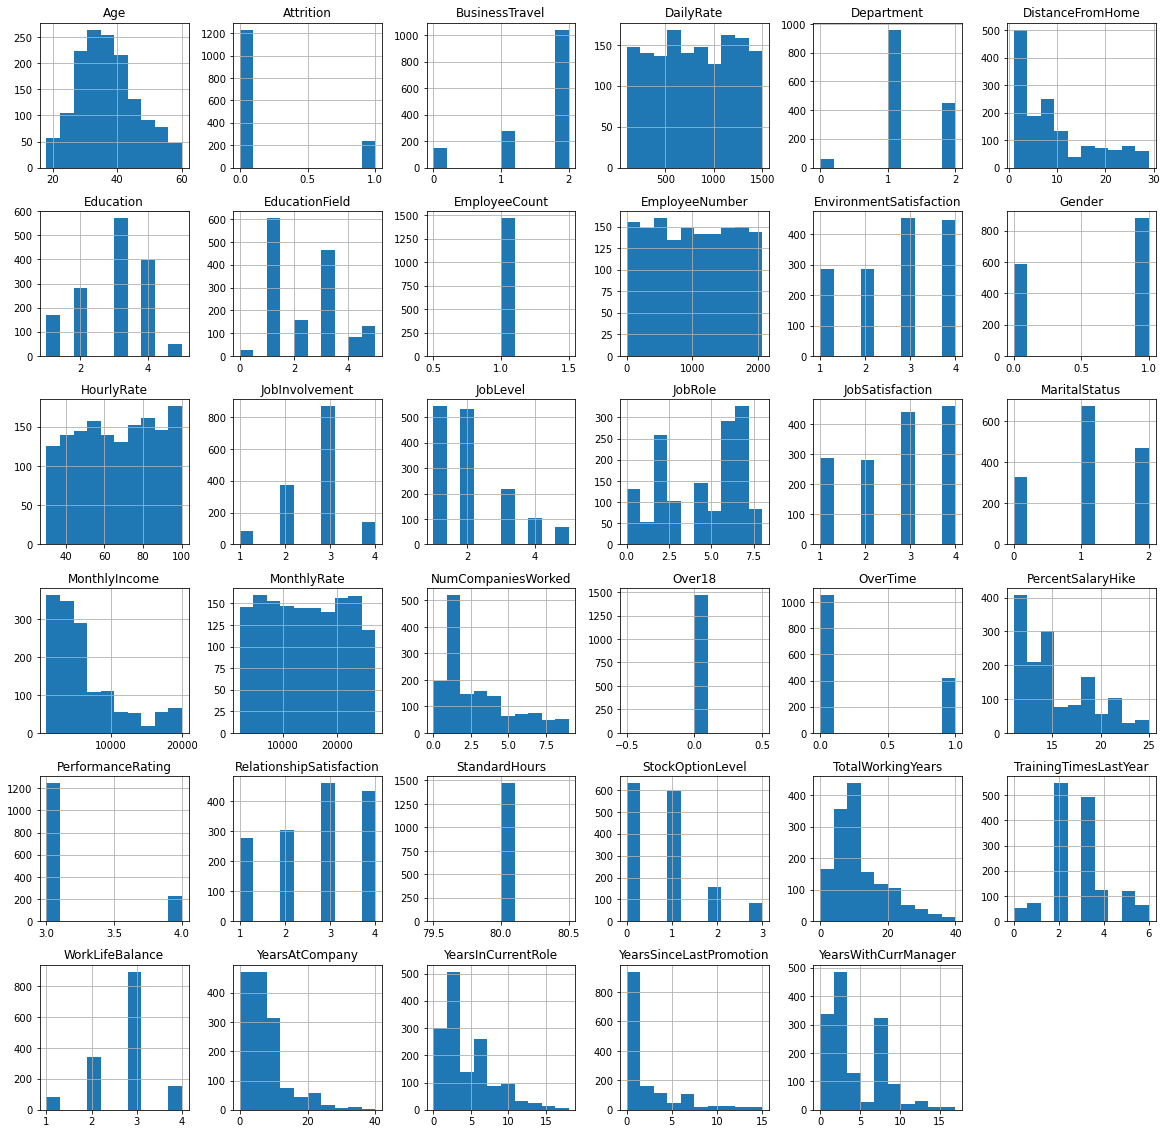

In [14]:
df.hist(figsize=(20, 20));

from looking at the histogram of the attrition feature, we can quickly notice that attrition is heavily skewed towards 0, meaning there is a lot less people that leave the company. Nonetheless, It is still important to learn why those that leave do so in order to develop strategies to retain them. 

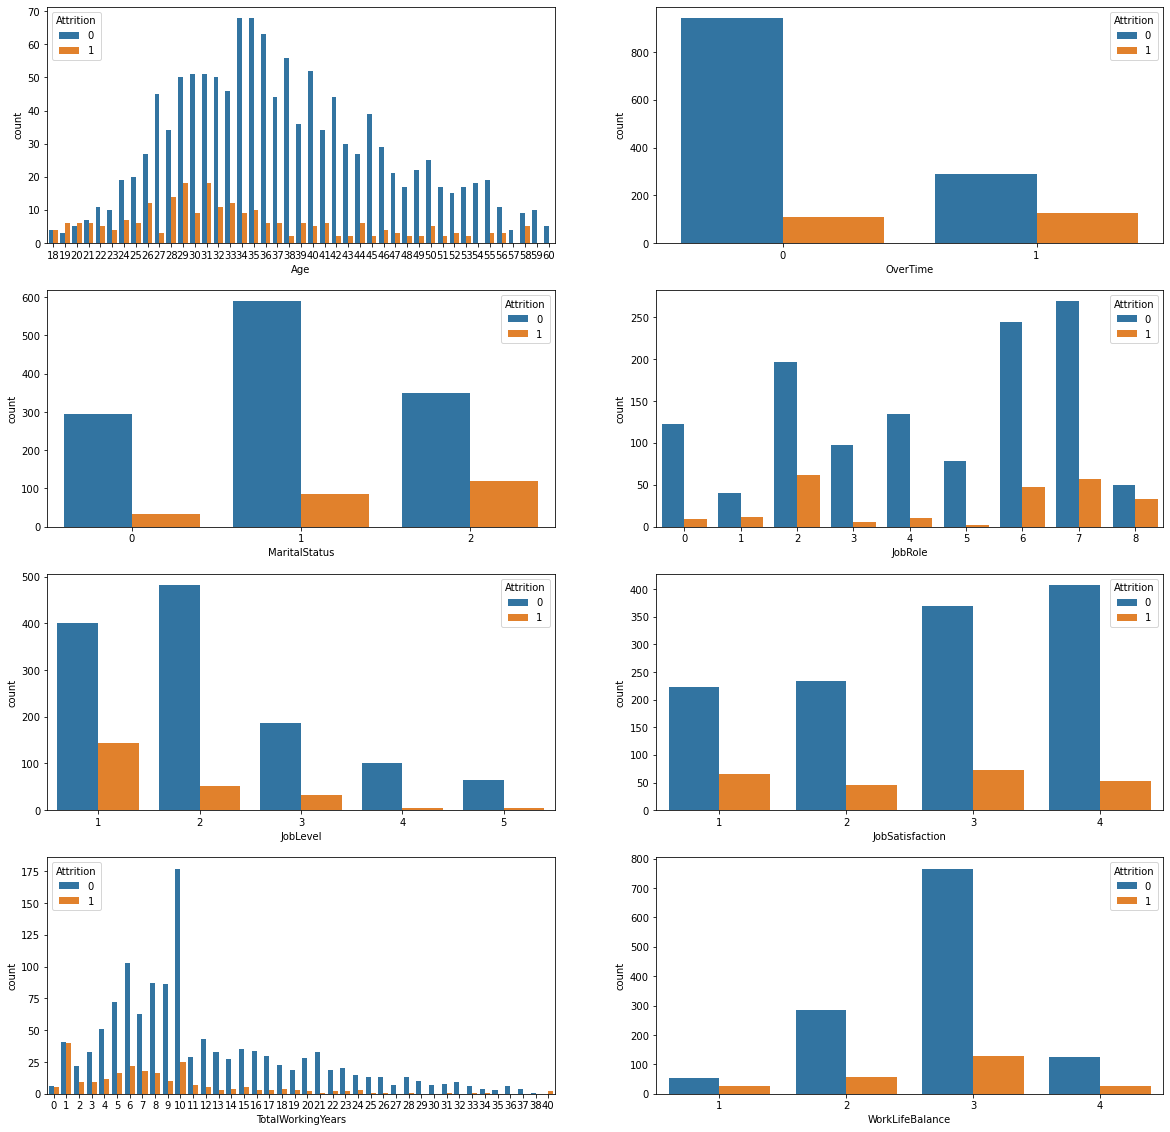

In [15]:
#plotting some countplots, splitting on Attrition
plt.figure(figsize=(20,20))

plt.subplot(421)
sns.countplot(x='Age',data=df,hue='Attrition')
plt.subplot(422)
sns.countplot(x='OverTime', data=df, hue='Attrition')
plt.subplot(423)
sns.countplot(x='MaritalStatus', data=df, hue='Attrition')
plt.subplot(424)
sns.countplot(x='JobRole', data=df, hue='Attrition')
plt.subplot(425)
sns.countplot(x='JobLevel', data=df, hue='Attrition')
plt.subplot(426)
sns.countplot(x='JobSatisfaction', data=df, hue='Attrition')
plt.subplot(427)
sns.countplot(x='TotalWorkingYears', data=df, hue='Attrition')
plt.subplot(428)
sns.countplot(x='WorkLifeBalance', data=df, hue='Attrition')

plt.show()

Some observations that can be made:

 1. Almost 50% of employees who work overtime end up leaving the company.
 2. JobLevel = 1 has the highest percentage of attrition (Approx. 26%).
 3. Almost 50% of employees with TotalWorkingYears = 1 end up leaving the company.
 4. Laboratory Technicians have the highest percentage of attrition.
 5. Single employees are more likely to leave the company.
 6. Employees with a lower JobSatisfaction level are more likely to leave the company.

In [16]:
#let's get rid of the StandardHours, EmployeeCount and Over18 column, as all rows have the same value.

df.drop(['StandardHours','Over18','EmployeeCount','EmployeeNumber'],axis=1,inplace=True)

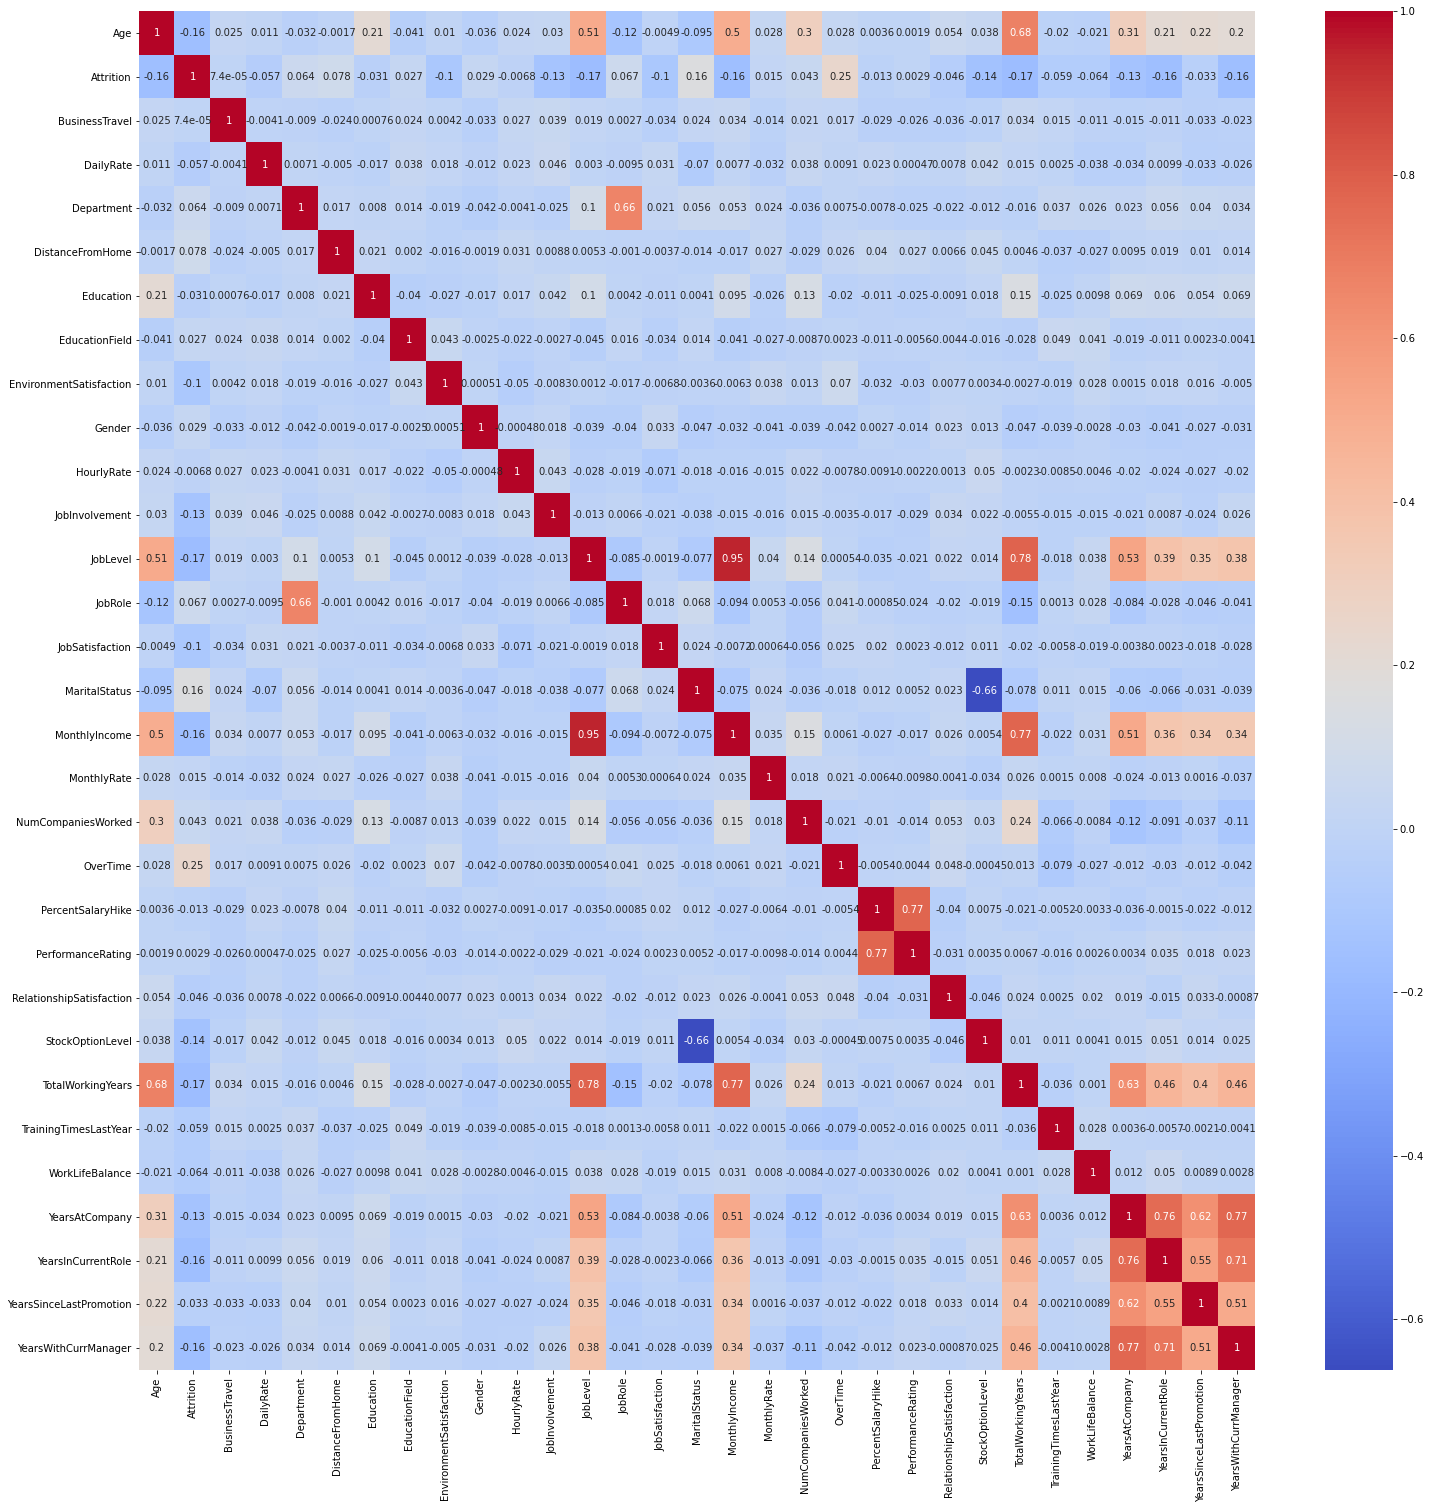

In [17]:
#this will be quite a large heatmap, but will be worth taking a look at to spot correlated features
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

From the heatmap, we remark the following:

- Age is correlated with several features, including: NumCompaniesWorked, MonthlyIncome, JobLevel, Education, and other more obvious features such relating to seniority.

- Attrition has some negative correlation with the following features: YearsWithCurrManager, YearsInCurrentRole, YearsAtCompany, TotalWorkingYears, StockOptionLevel, MonthlyIncome, JobLevel, JobInvolvement, EnvironmentSatisfaction, and Age. Attrition is also correlated with OverTime

- As expected, JobLevel is perfectly correlated with monthly income. It is also highly correlated TotalWorkingYears, i.e. work experience.

- Job satisfaction seems to have no correlation with any of the other features.

- Performance Rating is highly correlated with PercentSalaryHike, i.e. high performance earn better raises.

In [18]:
#Splitting the dataset
df_final = df.drop('Attrition',axis=1)
y = df['Attrition']

In [19]:
# Scaling the data
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df_final)

### Machine Learning Model Implementation

Now that we've explored our data and converted categorical data into numerical data, we can now move forward with the implementation of our ML model.

for the puropose of this classification task, I've opted for the implementation of a Random Forest Classifier, as it combines the predictive powers of decision trees in order to create a more accurate model.

In [21]:
#import the train_test_split model
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=71)

In [38]:
#importing RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [39]:
#initializing the RFC object
rfc = RandomForestClassifier(n_estimators=1000)

In [40]:
#fitting the data
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [41]:
#making the predictions
predictions = rfc.predict(X_test)

In [42]:
#importing some reporting tools
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [43]:
print('classification report: ')
print('='*40)
print(classification_report(y_test,predictions))
print('\n')
print('confusion matrix: ')
print('='*40)
print(confusion_matrix(y_test,predictions))

classification report: 
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       373
           1       0.62      0.15      0.24        68

    accuracy                           0.85       441
   macro avg       0.74      0.57      0.58       441
weighted avg       0.83      0.85      0.81       441



confusion matrix: 
[[367   6]
 [ 58  10]]


we can see that our model did an alright job with an accuracy of 85%.

As noted before, there exists a significant imbalance between the count of each of the two attrition values. Let's see if we can improve our model using SMOTE. 

In [44]:
from imblearn.over_sampling import SMOTE

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=71)

In [46]:
sm = SMOTE(random_state=71)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [47]:
rfc = RandomForestClassifier(n_estimators=1000)

In [48]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [49]:
predictions = rfc.predict(X_test)

In [50]:
print('classification report: ')
print('='*40)
print(classification_report(y_test,predictions))
print('\n')
print('confusion matrix: ')
print('='*40)
print(confusion_matrix(y_test,predictions))

classification report: 
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       373
           1       0.57      0.25      0.35        68

    accuracy                           0.85       441
   macro avg       0.72      0.61      0.63       441
weighted avg       0.83      0.85      0.83       441



confusion matrix: 
[[360  13]
 [ 51  17]]


Here we observe that using SMOTE actually made our accuracy worse and only slightly improved our True Negative classifications. I am not sure why this is the case, but perhaps a more experienced/knowledgeable individual can point me in the right direction! 

- 17/Jul/2020 - EDIT_1: Scaled the data. This seemed to help SMOTE improve the model, but not by much.

### Conclusion

In this notebook, we implemented a  simple pipeline of predicting employee attrition. We went over some EDA, Feature Engineering, and implemented a straightforward Random Forest Classifier with an 85% accuracy score (though I'm sure it can be improved).

On that note, more features can be derived from the data that might also help improve the model. I will be coming back to this notebook to give it another go as I improve my python skills.